In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier

In [7]:
df=pd.read_csv('winequality-white.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [8]:
X=df.drop('quality',axis=1)
Y=df['quality']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [14]:
dt=DecisionTreeClassifier(random_state=42)
lr=LogisticRegression(random_state=42)
svc=SVC(random_state=42)
knn=KNeighborsClassifier()

In [19]:
Ada=AdaBoostClassifier(base_estimator=dt,learning_rate=0.1,random_state=42,n_estimators=50)
Gb=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=42)
Stacking=StackingClassifier(estimators=[('svc',svc),('dt',dt),('knn',knn)],final_estimator=lr)

In [20]:
print('Accuracy Scores:')
for clf in [Ada,Gb,Stacking]:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print(f"{clf.__class__.__name__}:{accuracy_score(y_test,y_pred)}")

Accuracy Scores:
AdaBoostClassifier:0.5775510204081633
GradientBoostingClassifier:0.5826530612244898


C:\Users\madha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

StackingClassifier:0.6142857142857143


In [21]:
def plot_confusion_matrix(y_true,y_pred,title):
    con=confusion_matrix(y_true,y_pred)
    sns.heatmap(con,annot=True,cbar=False,cmap=plt.cm.Blues,fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

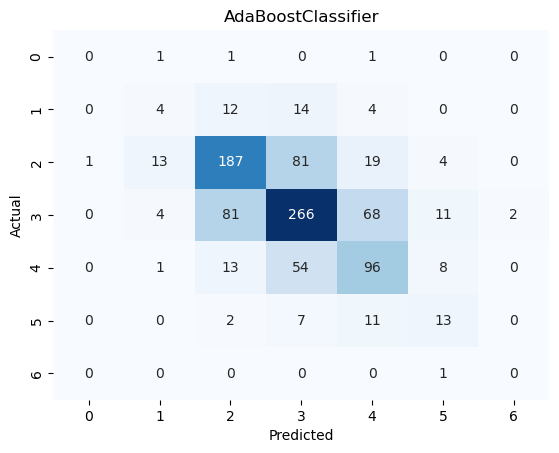

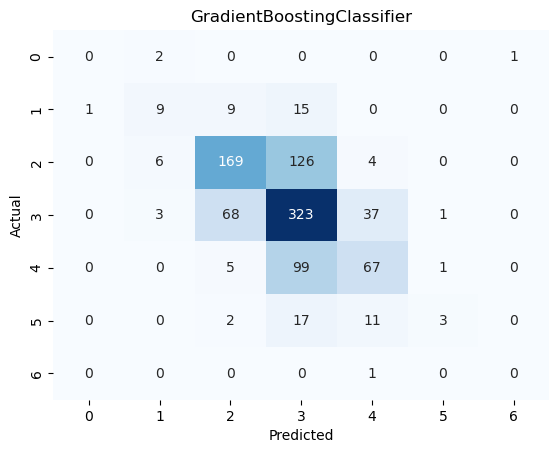

C:\Users\madha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

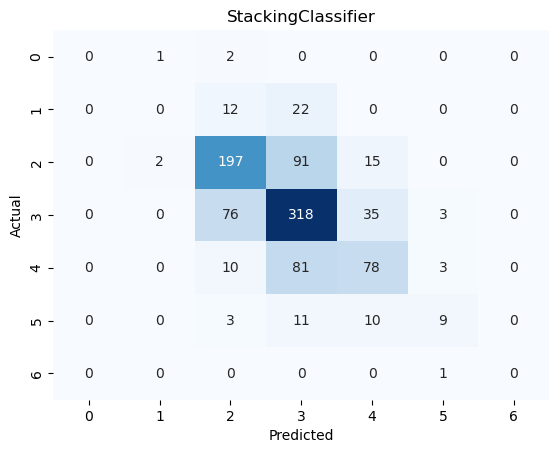

In [22]:
for clf in[Ada,Gb,Stacking]:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    title=clf.__class__.__name__
    plot_confusion_matrix(y_test,y_pred,title)

C:\Users\madha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

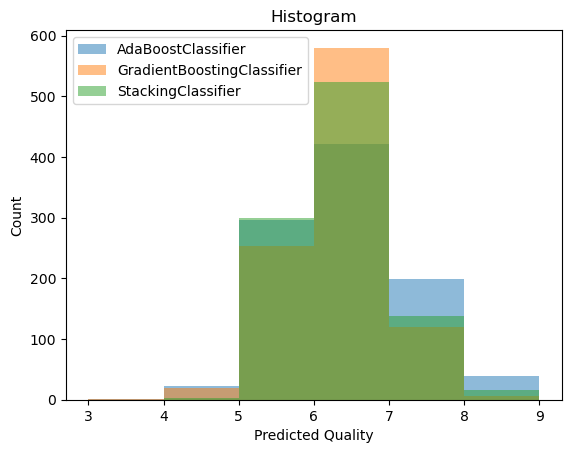

In [24]:
for clf in [Ada,Gb,Stacking]:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    plt.hist(y_pred,bins=range(3,10),label=clf.__class__.__name__,alpha=0.5)
    plt.xlabel('Predicted Quality')
    plt.ylabel('Count')
    plt.title('Histogram')
    plt.legend()
plt.show()